# 线性回归模型与诊断
数据说明：本数据是一份汽车贷款数据

|字段名|中文含义|
|:--:|:--:|
|id|id|
|Acc|是否开卡(1=已开通)|
|avg_exp|月均信用卡支出（元）|
|avg_exp_ln|月均信用卡支出的自然对数|
|gender|性别(男=1)|
|Age|年龄|
|Income|年收入（万元）|
|Ownrent|是否自有住房（有=1；无=0)|
|Selfempl|是否自谋职业(1=yes, 0=no)|
|dist_home_val|所住小区房屋均价(万元)|
|dist_avg_income|当地人均收入|
|high_avg|高出当地平均收入|
|edu_class|教育等级：小学及以下开通=0，中学=1，本科=2，研究生=3|

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# os.chdir('E:/data')
pd.set_option('display.max_columns', 8)

导入数据和数据清洗

In [ ]:
raw = pd.read_csv('creditcard_exp.csv', skipinitialspace=True)
raw.head()

,id,Acc,avg_exp,avg_exp_ln,...,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,...,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,...,15.796316,1024,0.051184,2
2,95,0,NaN,NaN,...,7.490000,1296,0.910000,1
3,86,1,856.57,6.752936,...,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,...,13.346474,784,0.062676,2


In [ ]:
exp = raw[raw['avg_exp'].notnull()].copy().iloc[:, 2:]\
.drop('age2',axis=1)

exp_new = raw[raw['avg_exp'].isnull()].copy().iloc[:, 2:]\
.drop('age2',axis=1)

exp.describe(include='all')

,avg_exp,avg_exp_ln,gender,Age,...,dist_home_val,dist_avg_income,high_avg,edu_class
count,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000
mean,983.655429,6.787787,0.285714,31.157143,...,74.540857,8.005472,-0.580766,1.928571
std,446.294237,0.476035,0.455016,7.206349,...,36.949228,3.070744,0.432808,0.873464
min,163.180000,5.094854,0.000000,20.000000,...,13.130000,3.828842,-1.526850,0.000000
25%,697.155000,6.547003,0.000000,26.000000,...,49.302500,5.915553,-0.887981,1.000000
50%,884.150000,6.784627,0.000000,30.000000,...,65.660000,7.084184,-0.612068,2.000000
75%,1229.585000,7.114415,1.000000,36.000000,...,105.067500,9.123105,-0.302082,3.000000
max,2430.030000,7.795659,1.000000,55.000000,...,157.900000,18.427000,0.259337,3.000000


### 相关性分析
散点图

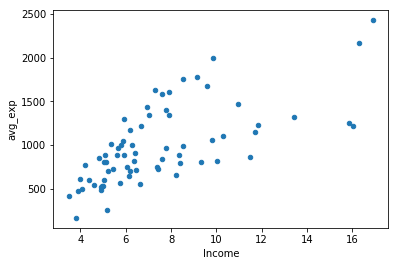

In [ ]:
exp.plot('Income', 'avg_exp', kind='scatter')
plt.show()

In [ ]:
exp[['Income', 'avg_exp', 'Age', 'dist_home_val']].corr(method='pearson')

,Income,avg_exp,Age,dist_home_val
Income,1.000000,0.674011,0.369129,0.249153
avg_exp,0.674011,1.000000,0.258478,0.319499
Age,0.369129,0.258478,1.000000,0.109323
dist_home_val,0.249153,0.319499,0.109323,1.000000


## 线性回归算法
### 简单线性回归

In [ ]:
lm_s = ols('avg_exp ~ Income', data=exp).fit()
print(lm_s.params)

Intercept    258.049498
Income        97.728578
dtype: float64


Predict-在原始数据集上得到预测值和残差

In [ ]:
lm_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     56.61
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           1.60e-10
Time:                        08:57:17   Log-Likelihood:                -504.69
No. Observations:                  70   AIC:                             1013.
Df Residuals:                      68   BIC:                             1018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    258.0495    104.290      2.474      0.016      49.942     466.157
Income        97.7286     12.989      7.524      0.000      71.809     123.648
==============================================================================
Omnibus:                        3.714   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.507
Skew:                           0.485   Prob(JB):                        0.173
Kurtosis:                       2.490   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pd.DataFrame([lm_s.predict(exp), lm_s.resid], index=['predict', 'resid']
            ).T.head()

,predict,resid
0,1825.141904,-608.111904
1,1806.803136,-555.303136
3,1379.274813,-522.704813
4,1568.506658,-246.676658
5,1238.281793,-422.251793


在待预测数据集上得到预测值

In [ ]:
lm_s.predict(exp_new)[:5]

2     1078.969552
11     756.465245
13     736.919530
19     687.077955
20     666.554953
dtype: float64

### 多元线性回归

In [ ]:
lm_m = ols('avg_exp ~Income + dist_home_val + dist_avg_income',
           data=exp).fit()
lm_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     25.95
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           3.34e-11
Time:                        08:57:17   Log-Likelihood:                -498.62
No. Observations:                  70   AIC:                             1005.
Df Residuals:                      66   BIC:                             1014.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.3507    122.525      0.019      0.985    -242.278     246.980
Income           -164.4378     86.487     -1.901      0.062    -337.115       8.239
dist_home_val       1.5396      1.049      1.468      0.147      -0.555       3.634
dist_avg_income   260.7522     87.058      2.995      0.004      86.934     434.570
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.367
Skew:                           0.642   Prob(JB):                       0.0683
Kurtosis:                       2.563   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
exp.Income

0     16.03515
1     15.84750
3     11.47285
4     13.40915
5     10.03015
6     11.70575
7     11.81885
8      9.31260
9     16.28885
10     8.21290
12    10.31100
14    16.90015
15     9.81175
16     8.37990
17     9.57100
18     7.91000
22     8.36860
23     7.43320
25     6.62415
26     8.53830
27     6.67270
29    10.96410
30     7.37330
32     7.02025
34     9.13150
35     7.62235
39     6.14075
40     5.92290
41     7.93215
42     7.79915
        ...   
56     5.91685
57     5.04755
58     3.99125
60     4.91825
61     5.66840
62     5.80935
64     5.02000
67     7.78860
68     7.30525
69     6.07935
71     4.93595
72     4.90190
73     5.15780
74     6.35895
75     5.09540
76     5.89170
78     4.81890
80     5.06555
81     4.19345
82     4.62600
83     6.42760
84     6.17745
85     5.33175
87     5.44810
89     5.22925
93     4.05520
94     3.89305
96     4.37960
97     3.49390
98     3.81590
Name: Income, Length: 70, dtype: float64

### 多元线性回归的变量筛选

In [ ]:
'''forward select'''
def forward_select(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula = "{} ~ {}".format(
                response,' + '.join(selected + [candidate]))
            aic = ols(formula=formula, data=data).fit().aic
            aic_with_candidates.append((aic, candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score, best_candidate=aic_with_candidates.pop()
        if current_score > best_new_score: 
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print ('aic is {},continuing!'.format(current_score))
        else:        
            print ('forward selection over!')
            break
            
    formula = "{} ~ {} ".format(response,' + '.join(selected))
    print('final formula is {}'.format(formula))
    model = ols(formula=formula, data=data).fit()
    return(model)

In [ ]:
data_for_select = exp[['avg_exp', 'Income', 'Age', 'dist_home_val', 
                       'dist_avg_income']]
lm_m = forward_select(data=data_for_select, response='avg_exp')
print(lm_m.rsquared)

aic is 1007.6801413968115,continuing!
aic is 1005.4969816306302,continuing!
aic is 1005.2487355956046,continuing!
forward selection over!
final formula is avg_exp ~ dist_avg_income + Income + dist_home_val 
0.541151292841


# 线性回归的诊断
### 残差分析

In [ ]:
ana1 = lm_s

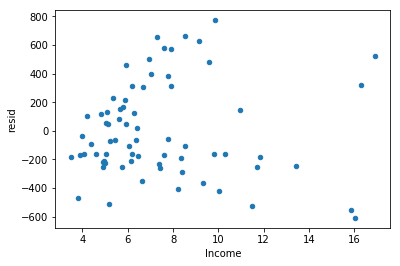

In [ ]:
exp['Pred'] = ana1.predict(exp)
exp['resid'] = ana1.resid
exp.plot('Income', 'resid',kind='scatter')
plt.show()

遇到异方差情况,教科书上会介绍使用加权最小二乘法，但是实际上最常用的是对被解释变量取对数

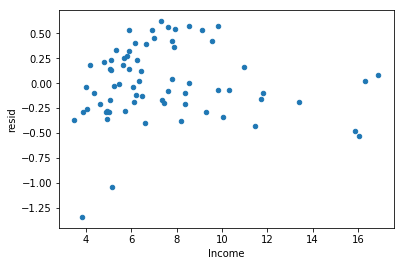

In [ ]:
ana2 = ols('avg_exp_ln ~ Income', exp).fit()
exp['Pred'] = ana2.predict(exp)
exp['resid'] = ana2.resid
exp.plot('Income', 'resid',kind='scatter')
plt.show()

取对数会使模型更有解释意义

In [ ]:
exp['Income_ln'] = np.log(exp['Income'])

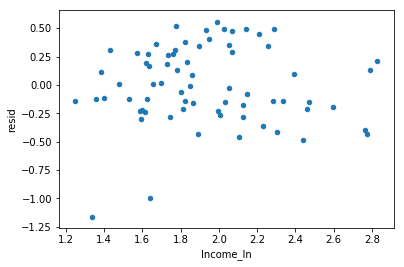

In [ ]:
ana3 = ols('avg_exp_ln ~ Income_ln', exp).fit()
exp['Pred'] = ana3.predict(exp)
exp['resid'] = ana3.resid
exp.plot('Income_ln', 'resid',kind='scatter')
plt.show()

寻找最优的模型

In [ ]:
r_sq = {'exp~Income':ana1.rsquared, 'ln(exp)~Income':ana2.rsquared, 
        'ln(exp)~ln(Income)':ana3.rsquared}
print(r_sq)

{'exp~Income': 0.45429062315565294, 'ln(exp)~Income': 0.4030855555329651, 'ln(exp)~ln(Income)': 0.48039279938931101}


### 强影响点分析

In [ ]:
exp['resid_t'] = \
(exp['resid'] - exp['resid'].mean()) / exp['resid'].std()

Find outlier：

In [ ]:
exp[abs(exp['resid_t']) > 2]

,avg_exp,avg_exp_ln,gender,Age,...,Pred,resid,Income_ln,resid_t
73,251.56,5.527682,0,29,...,6.526331,-0.998649,1.640510,-2.910292
98,163.18,5.094854,0,22,...,6.257191,-1.162337,1.339177,-3.387317


Drop outlier

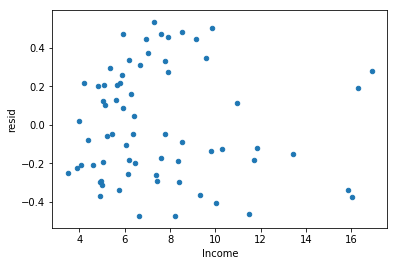

In [ ]:
exp2 = exp[abs(exp['resid_t']) <= 2].copy()
ana4 = ols('avg_exp_ln ~ Income_ln', exp2).fit()
exp2['Pred'] = ana4.predict(exp2)
exp2['resid'] = ana4.resid
exp2.plot('Income', 'resid', kind='scatter')
plt.show()

In [ ]:
ana4.rsquared

0.49397191385172479

statemodels包提供了更多强影响点判断指标

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

OLSInfluence(ana3).summary_frame().head()

,dfb_Intercept,dfb_Income_ln,cooks_d,dffits,dffits_internal,hat_diag,standard_resid,student_resid
0,0.343729,-0.381393,0.085587,-0.416040,-0.413732,0.089498,-1.319633,-1.326996
1,0.307196,-0.341294,0.069157,-0.373146,-0.371907,0.087409,-1.201699,-1.205702
3,0.207619,-0.244956,0.044984,-0.302382,-0.299947,0.041557,-1.440468,-1.452165
4,0.112301,-0.127713,0.010759,-0.145967,-0.146693,0.060926,-0.575913,-0.573062
5,0.120572,-0.150924,0.022274,-0.211842,-0.211064,0.029011,-1.221080,-1.225579


In [ ]:
(exp['resid'] - exp['resid'].mean()) / exp['resid'].std()

0    -1.268422
1    -1.156390
3    -1.420551
4    -0.562182
5    -1.212052
6    -0.611471
7    -0.434505
8    -1.067499
9     0.373061
10   -1.334228
12   -0.407880
14    0.609985
15   -0.413575
16   -0.831339
17    1.000710
18    0.855774
22   -0.508416
23   -0.770237
25   -1.266990
26   -0.236612
27    1.007705
29    0.277014
30   -0.677789
32    1.170821
34    1.302342
35   -0.432414
39   -0.606185
40    0.394131
41    1.372630
42   -0.084224
        ...   
56    1.517375
57    0.551946
58    0.339652
60   -0.869507
61    0.758040
62    0.784004
64   -0.701315
67    1.027070
68    1.627675
69   -0.170786
71   -0.639679
72   -0.659551
73   -2.910292
74   -0.019559
75    0.800620
76    0.902861
78    0.807223
80   -0.363788
81    0.898805
82   -0.372982
83    0.249463
84    1.113198
85    1.043669
87    0.042377
89    0.018987
93   -0.335109
94   -0.365148
96    0.018922
97   -0.411216
98   -3.387317
Name: resid, Length: 70, dtype: float64

### 增加变量
经过单变量线性回归的处理，我们基本对模型的性质有了一定的了解，接下来可以放入更多的连续型解释变量。在加入变量之前，要注意变量的函数形式转变。比如当地房屋均价、当地平均收入，其性质和个人收入一样，都需要取对数

In [ ]:
exp2['dist_home_val_ln'] = np.log(exp2['dist_home_val'])
exp2['dist_avg_income_ln'] = np.log(exp2['dist_avg_income'])

ana5 = ols('''avg_exp_ln ~ Age + Income_ln + 
           dist_home_val_ln + dist_avg_income_ln''', exp2).fit()
ana5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     19.48
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           1.79e-10
Time:                        08:57:18   Log-Likelihood:                -7.3496
No. Observations:                  68   AIC:                             24.70
Df Residuals:                      63   BIC:                             35.80
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.6265      0.317     14.574      0.000       3.992       5.261
Age                   -0.0006      0.005     -0.117      0.907      -0.011       0.010
Income_ln             -0.1802      0.569     -0.317      0.752      -1.317       0.957
dist_home_val_ln       0.1258      0.058      2.160      0.035       0.009       0.242
dist_avg_income_ln     1.0093      0.612      1.649      0.104      -0.214       2.233
==============================================================================
Omnibus:                        4.111   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                2.466
Skew:                           0.248   Prob(JB):                        0.291
Kurtosis:                       2.210   Cond. No.                         807.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 多重共线性分析

In [ ]:
# Step regression is not always work.

In [ ]:
ana5.bse # The standard errors of the parameter estimates

Intercept             0.317453
Age                   0.005124
Income_ln             0.568848
dist_home_val_ln      0.058210
dist_avg_income_ln    0.612197
dtype: float64

The function "statsmodels.stats.outliers_influence.variance_inflation_factor" uses "OLS" to fit data, and it will generates a wrong rsquared. So define it ourselves!

In [ ]:
def vif(df, col_i):
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2)

In [ ]:
exog = exp2[['Age', 'Income_ln', 'dist_home_val_ln',
             'dist_avg_income_ln']]

for i in exog.columns:
    print(i, '\t', vif(df=exog, col_i=i))

Age 	 1.16911853872
Income_ln 	 36.9833141403
dist_home_val_ln 	 1.05362871659
dist_avg_income_ln 	 36.9228661413


Income_ln与dist_avg_income_ln具有共线性，使用“高出平均收入的比率”代替其中一个

In [ ]:
exp2['high_avg_ratio'] = exp2['high_avg'] / exp2['dist_avg_income']

In [ ]:
exog1 = exp2[['Age', 'high_avg_ratio', 'dist_home_val_ln', 
              'dist_avg_income_ln']]

for i in exog1.columns:
    print(i, '\t', vif(df=exog1, col_i=i))

Age 	 1.17076558293
high_avg_ratio 	 1.13471925006
dist_home_val_ln 	 1.05273293881
dist_avg_income_ln 	 1.30890414936


In [ ]:
var_select = exp2[['avg_exp_ln', 'Age', 'high_avg_ratio', 
                   'dist_home_val_ln', 'dist_avg_income_ln']]
ana7 = forward_select(data=var_select, response='avg_exp_ln')
print(ana7.rsquared)

aic is 23.816793700737392,continuing!
aic is 20.83095227956072,continuing!
forward selection over!
final formula is avg_exp_ln ~ dist_avg_income_ln + dist_home_val_ln 
0.552039773685


In [ ]:
exp2.Ownrent

0     1
1     1
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    1
12    1
14    0
15    1
16    1
17    0
18    1
22    1
23    0
25    0
26    1
27    0
29    1
30    0
32    0
34    1
35    0
39    0
40    0
41    1
42    0
     ..
54    0
55    0
56    0
57    0
58    1
60    0
61    0
62    0
64    0
67    1
68    1
69    1
71    0
72    0
74    1
75    0
76    1
78    0
80    0
81    0
82    0
83    1
84    0
85    0
87    1
89    0
93    0
94    0
96    0
97    0
Name: Ownrent, Length: 68, dtype: int64

In [ ]:
formula8 = '''
avg_exp_ln ~ dist_avg_income_ln + dist_home_val_ln + 
C(gender) + C(Ownrent) + C(Selfempl) + C(edu_class)
'''
ana8 = ols(formula8, exp2).fit()
ana8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     58.71
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           1.75e-24
Time:                        08:57:19   Log-Likelihood:                 35.337
No. Observations:                  68   AIC:                            -54.67
Df Residuals:                      60   BIC:                            -36.92
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.5520      0.212     21.471      0.000       4.128       4.976
C(gender)[T.1]        -0.4301      0.060     -7.200      0.000      -0.550      -0.311
C(Ownrent)[T.1]        0.0184      0.045      0.413      0.681      -0.071       0.107
C(Selfempl)[T.1]      -0.3805      0.119     -3.210      0.002      -0.618      -0.143
C(edu_class)[T.2]      0.2895      0.051      5.658      0.000       0.187       0.392
C(edu_class)[T.3]      0.4686      0.060      7.867      0.000       0.349       0.588
dist_avg_income_ln     0.9563      0.098      9.722      0.000       0.760       1.153
dist_home_val_ln       0.0522      0.034      1.518      0.134      -0.017       0.121
==============================================================================
Omnibus:                        3.788   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                4.142
Skew:                           0.020   Prob(JB):                        0.126
Kurtosis:                       4.208   Cond. No.                         60.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
formula9 = '''
avg_exp_ln ~ dist_avg_income_ln + dist_home_val_ln + 
C(Selfempl) + C(gender)*C(edu_class)
'''
ana9 = ols(formula9, exp2).fit()
ana9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     78.50
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           1.42e-28
Time:                        08:57:19   Log-Likelihood:                 48.743
No. Observations:                  68   AIC:                            -79.49
Df Residuals:                      59   BIC:                            -59.51
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            4.4098      0.178     24.839      0.000       4.055       4.765
C(Selfempl)[T.1]                    -0.2945      0.101     -2.908      0.005      -0.497      -0.092
C(gender)[T.1]                      -0.0054      0.098     -0.055      0.956      -0.201       0.190
C(edu_class)[T.2]                    0.3164      0.045      7.012      0.000       0.226       0.407
C(edu_class)[T.3]                    0.5576      0.054     10.268      0.000       0.449       0.666
C(gender)[T.1]:C(edu_class)[T.2]    -0.4304      0.111     -3.865      0.000      -0.653      -0.208
C(gender)[T.1]:C(edu_class)[T.3]    -0.5948      0.111     -5.362      0.000      -0.817      -0.373
dist_avg_income_ln                   0.9893      0.078     12.700      0.000       0.833       1.145
dist_home_val_ln                     0.0654      0.029      2.278      0.026       0.008       0.123
==============================================================================
Omnibus:                        5.023   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.070
Skew:                          -0.328   Prob(JB):                       0.0793
Kurtosis:                       4.166   Cond. No.                         61.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 正则算法
### 岭回归

In [ ]:
exp.columns

Index(['avg_exp', 'avg_exp_ln', 'gender', 'Age', 'Income', 'Ownrent',
       'Selfempl', 'dist_home_val', 'dist_avg_income', 'high_avg', 'edu_class',
       'Pred', 'resid', 'Income_ln', 'resid_t'],
      dtype='object')

In [ ]:
lmr = ols('avg_exp ~ Income + dist_home_val + dist_avg_income',
          data=exp).fit_regularized(alpha=1, L1_wt=0)

# print(lmr.summary2())
# L1_wt参数为0则使用岭回归，为1使用lasso

lmr.predict(exp_new)
lmr.summary()

### LASSO算法

In [ ]:
lmr1 = ols('avg_exp ~ Age + Income + dist_home_val + dist_avg_income',
           data=exp).fit_regularized(alpha=1, L1_wt=1)
lmr1.summary()

### 使用scikit-learn进行正则化参数调优

In [ ]:
from sklearn.preprocessing import StandardScaler

continuous_xcols = ['Age', 'Income', 'dist_home_val', 
                    'dist_avg_income']   #  抽取连续变量
scaler = StandardScaler()  # 标准化
X = scaler.fit_transform(exp[continuous_xcols])
y = exp['avg_exp_ln']

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-2, 3, 100, base=10)

# Search the min MSE by CV
rcv = RidgeCV(alphas=alphas, store_cv_values=True) 
rcv.fit(X, y)

RidgeCV(alphas=array([  1.00000e-02,   1.12332e-02, ...,   8.90215e+02,   1.00000e+03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [ ]:
print('The best alpha is {}'.format(rcv.alpha_))
print('The r-square is {}'.format(rcv.score(X, y))) 
# Default score is rsquared

The best alpha is 0.2915053062825176
The r-square is 0.47568267770195016


In [ ]:
X_new = scaler.transform(exp_new[continuous_xcols])
np.exp(rcv.predict(X_new)[:5])

array([ 759.67677561,  606.74024213,  661.20654568,  681.888929  ,
        641.06967182])

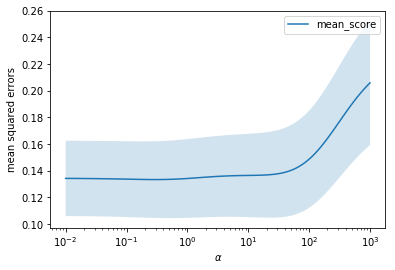

In [ ]:
cv_values = rcv.cv_values_
n_fold, n_alphas = cv_values.shape

cv_mean = cv_values.mean(axis=0)
cv_std = cv_values.std(axis=0)
ub = cv_mean + cv_std / np.sqrt(n_fold)
lb = cv_mean - cv_std / np.sqrt(n_fold)

plt.semilogx(alphas, cv_mean, label='mean_score')
plt.fill_between(alphas, lb, ub, alpha=0.2)
plt.xlabel("$\\alpha$")
plt.ylabel("mean squared errors")
plt.legend(loc="best")
plt.show()

In [ ]:
rcv.coef_

array([ 0.03321449, -0.30956185,  0.05551208,  0.59067449])

手动选择正则化系数——根据业务判断

岭迹图

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()

coefs = []
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

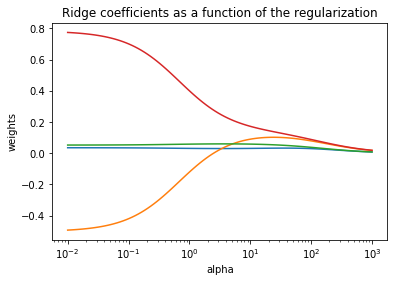

In [ ]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
ridge.set_params(alpha=0.29)
ridge.fit(X, y)
ridge.coef_

array([ 0.03322236, -0.31025822,  0.05550095,  0.59137388])

In [ ]:
ridge.score(X, y)

0.47570606320970144

预测

In [ ]:
np.exp(ridge.predict(X_new)[:5])

array([ 759.41895475,  606.60026138,  661.19740358,  681.83830832,
        641.070022  ])

lasso

In [ ]:
from sklearn.linear_model import LassoCV

lasso_alphas = np.logspace(-3, 0, 100, base=10)
lcv = LassoCV(alphas=lasso_alphas, cv=10) # Search the min MSE by CV
lcv.fit(X, y)

print('The best alpha is {}'.format(lcv.alpha_))
print('The r-square is {}'.format(lcv.score(X, y))) 
# Default score is rsquared

The best alpha is 0.04037017258596556
The r-square is 0.4426451069862233


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_coefs = []
for alpha in lasso_alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)

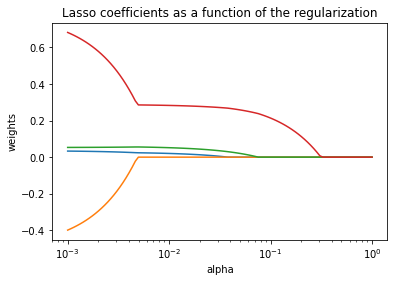

In [ ]:
ax = plt.gca()

ax.plot(lasso_alphas, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
lcv.coef_

array([ 0.        ,  0.        ,  0.02789489,  0.26549855])

弹性网络

In [ ]:
from sklearn.linear_model import ElasticNetCV

l1_ratio = [0.01, .1, .5, .7, .9, .95, .99, 1]

encv = ElasticNetCV(l1_ratio=l1_ratio)
encv.fit(X, y)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
       n_alphas=100, n_jobs=1, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [ ]:
print('The best l1_ratio is {}'.format(encv.l1_ratio_))
print('The best alpha is {}'.format(encv.alpha_))

The best l1_ratio is 0.01
The best alpha is 1.0998728529638144
